In [1]:
# giving google colab access to my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# loading libraries and reading in excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import sklearn
import seaborn as sns

data = pd.read_excel('/content/drive/MyDrive/cirights_df.xlsx')
data

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,wosoc_l,union_l,barg_l,hour_l,force_l,child_l,wage_l,safe_l,trafficking_l,trial_l
0,Canada,1981,194,20,20,124.0,21,21,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,Qatar,1981,524,694,694,634.0,142,145,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Rwanda,1981,533,517,517,646.0,2,14,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,Afghanistan,1981,101,700,700,4.0,142,62,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Equatorial Guinea,1981,269,411,411,226.0,2,17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,"Korea, Democratic People's Republic of",2021,374,731,731,408.0,142,30,NaN,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,3.0
7720,Kyrgyz Republic,2021,383,703,703,417.0,142,62,NaN,3.0,...,3.0,NaN,NaN,2.0,2.0,2.0,1.0,0.0,NaN,0.0
7721,Bahamas,2021,134,31,31,44.0,419,29,NaN,7.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,3.0
7722,Qatar,2021,524,694,694,634.0,142,145,NaN,6.0,...,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,NaN,2.0


In [3]:
# getting the columns of the data to see which explanatory variables should be chosen
data.columns

Index(['country', 'year', 'ciri', 'cow', 'polity', 'unctry', 'unreg',
       'unsubreg', 'human_rights_score', 'physint_sum', 'repression_sum',
       'civpol_sum', 'workerrights_practices_sum', 'workerrights_laws_sum',
       'disap', 'kill', 'polpris', 'tort', 'bbatrocity',
       'bbatrocity_intensity', 'assn', 'formov', 'dommov', 'speech', 'elecsd',
       'rel_free', 'wecon', 'wopol', 'wosoc_p', 'union_p', 'barg_p', 'hour_p',
       'force_p', 'child_p', 'wage_p', 'safe_p', 'trafficking_p', 'injud',
       'ngo_freedom', 'trial_p', 'wosoc_l', 'union_l', 'barg_l', 'hour_l',
       'force_l', 'child_l', 'wage_l', 'safe_l', 'trafficking_l', 'trial_l'],
      dtype='object')

In [5]:
#cleaning data so that none of the rows have NaNs for the prediction and explanatory variables/columns
data.dropna(subset = ['human_rights_score', 'physint_sum', 'civpol_sum', 'repression_sum'], inplace=True)

In [ ]:
data

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,union_l,barg_l,hour_l,force_l,child_l,wage_l,safe_l,trafficking_l,trial_l,respect_level
4420,Guyana,2005,320,110,110,328.0,419,5,60.0,5.0,...,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1
4422,Afghanistan,2005,101,700,700,4.0,142,62,20.0,4.0,...,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0
4425,Brazil,2005,170,140,140,76.0,419,5,52.0,4.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,0
4427,Armenia,2005,122,371,371,51.0,142,145,46.0,5.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,0
4428,Denmark,2005,245,390,390,208.0,150,154,88.0,8.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,Sierra Leone,2019,569,451,451,694.0,2,11,50.0,8.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0
7330,Morocco,2019,461,600,600,504.0,2,15,40.0,5.0,...,1.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,3.0,0
7331,Cyprus,2019,236,352,352,196.0,142,145,66.0,7.0,...,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,3.0,1
7332,Vietnam,2019,677,816,818,704.0,142,35,28.0,3.0,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0


In [6]:
# finding mean of human rights score to create the dummy variable
data['human_rights_score'].mean()

52.26290672451193

In [7]:
# creating the dummy variable where scores over 52 have higher respect for human rights, and scores below 52 have lower respect
data['respect_level'] = np.where(data['human_rights_score'] > 52, 1, 0)

The explanatory variables chosen to explore for the regression are physical integrity rights (physint_sum), repression (repression_sum), and civil-political liberties (civpol_sum) because they are regarded by scholars in the human rights subfield of world politics as strong indicators of human rights records of states, as they encompass a wide variety of different rights-related circumstances.

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# we can get a good idea of how each explanatory variable of interest
# is related to dummy variable, respect_level
# by creating grouped bar charts that will show the relationship between each explanatory variable of interest and the respect level for human rights



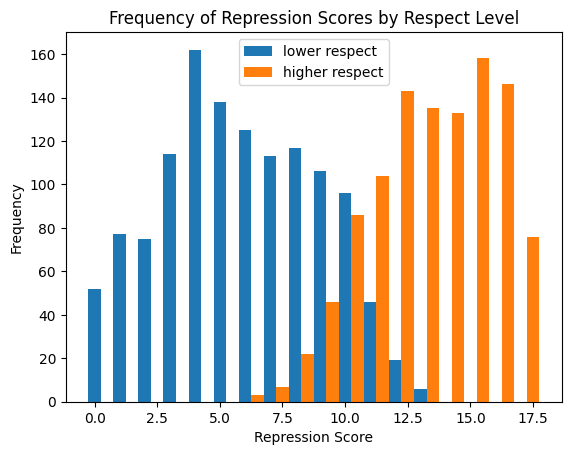

In [56]:
# grouped bar chart for repression score
repression_respect = data.groupby(['repression_sum', 'respect_level']).size().unstack()
fig, ax = plt.subplots()
index = np.arange(len(repression_respect))
bar_width = 0.5
bar1 = ax.bar(index, repression_respect[0]. values, bar_width, label = "lower respect")
bar1 = ax.bar(index + bar_width, repression_respect[1]. values, bar_width, label = "higher respect")
ax.set_title('Frequency of Repression Scores by Respect Level')
ax.set_xlabel('Repression Score')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


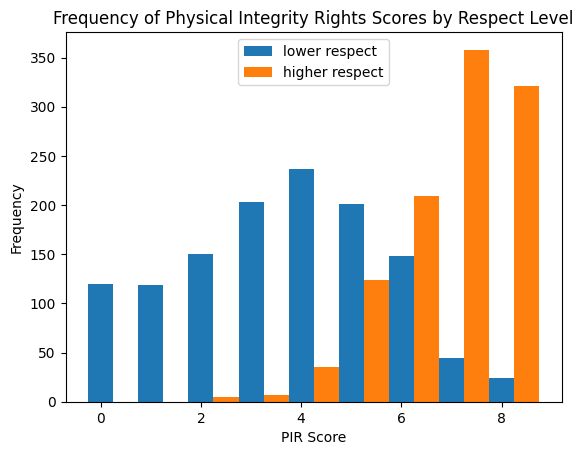

In [14]:
# grouped bar chart for physical integrity rights score
physint_respect = data.groupby(['physint_sum', 'respect_level']).size().unstack()
fig, ax = plt.subplots()
index = np.arange(len(physint_respect))
bar_width = 0.5
bar1 = ax.bar(index, physint_respect[0]. values, bar_width, label = "lower respect")
bar1 = ax.bar(index + bar_width, physint_respect[1]. values, bar_width, label = "higher respect")
ax.set_title('Frequency of Physical Integrity Rights Scores by Respect Level')
ax.set_xlabel('PIR Score')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

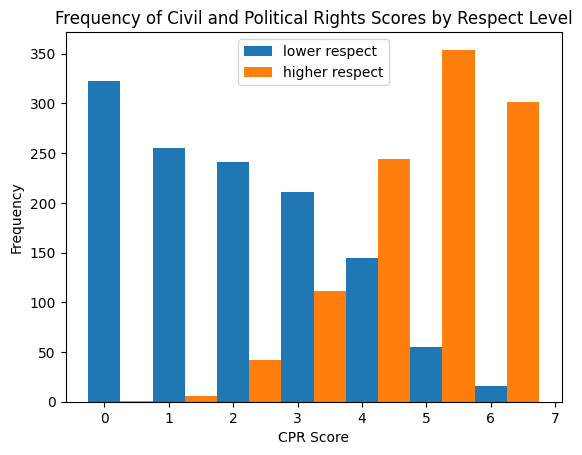

In [15]:
# grouped bar chart for civil and political rights score
civpol_respect = data.groupby(['civpol_sum', 'respect_level']).size().unstack()
fig, ax = plt.subplots()
index = np.arange(len(civpol_respect))
bar_width = 0.5
bar1 = ax.bar(index, civpol_respect[0]. values, bar_width, label = "lower respect")
bar1 = ax.bar(index + bar_width, civpol_respect[1]. values, bar_width, label = "higher respect")
ax.set_title('Frequency of Civil and Political Rights Scores by Respect Level')
ax.set_xlabel('CPR Score')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

From the exploratory analysis, all 3 grouped bar charts display a seemingly discernable relationship between a state's physical integrity score, repression score, and civil and political rights score and the human rights score of a country. States with better scores for all three variables largely have more respect for human rights. Therefore, we will be using these 3 explanatory variables for the regression after creating a dummy var from human_rights_score!

**Logistic Regression Using Only Statsmodels**

In [ ]:
# finding how many states fall under either of the outcomes created via the dummy variable
print("Total states that have 'higher respect' outcome: ", (data['respect_level'] == 0).sum())
print("Total states that have 'lower respect' outcome: ", (data['respect_level'] == 1).sum())

Total states that have 'higher respect' outcome:  1246
Total states that have 'lower respect' outcome:  1059


In [20]:
# using statsmodels to do multivariate logistic regression
human_rights_logit = logit('respect_level ~ repression_sum + civpol_sum + physint_sum', data = data).fit()

Optimization terminated successfully.
         Current function value: 0.215452
         Iterations 9


In [21]:
# getting the results of the regression
print(human_rights_logit.summary())

                           Logit Regression Results                           
Dep. Variable:          respect_level   No. Observations:                 2305
Model:                          Logit   Df Residuals:                     2301
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.6877
Time:                        15:50:44   Log-Likelihood:                -496.62
converged:                       True   LL-Null:                       -1590.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -9.4877      0.483    -19.626      0.000     -10.435      -8.540
repression_sum     1.3386      0.115     11.659      0.000       1.114       1.564
civpol_sum        -0.3016      0.121

In [22]:
# finding the exponential values of the parameters for better interpretation
np.exp(human_rights_logit.params)

Intercept         0.000076
repression_sum    3.813823
civpol_sum        0.739653
physint_sum       0.607570
dtype: float64

When the PIR of a state improves by 1 unit, the odds that the state has higher respect for human rights is 0.607570 times as large as the odds that it has lower respect for human rights, given that the effects of SR and CPR are held constant. Also, when the SR of a state improves by one unit, the odds that the state has higher respect for human rights is 3.813823 times as large as the odds that it has lower respect for human rights, given that the effects of PIR and CPR are held constant. Finally, when the CPR of a state improves by 1 unit, the odds that the state has higher respect for human rights is 0.739653 times as large as the odds that it has lower respect for human rights, given that the effects of PIR and SR are held constant. Looking at the coefficient, when CPR, SR, and PIR are at their lowest, 0, the odds that the state has higher respect for human rights is 0.000076 times as large as the odds that it has lower respect for human rights.

**Logistic Regression Using Statsmodels and Sklearn for Test/Train Split Feature and Confusion Matrix**

In [25]:
# creating the independent variables and dependent variable of the multivariate logistic regression model
x = data  # Explanatory variables
y = data['respect_level']  # Response variable

In [26]:
from sklearn.model_selection import train_test_split

# spliting data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size = 0.8,
    random_state = 16,
)


In [ ]:
# getting the training and testing sample size for the response variable
print("Training Sample Size: ", len(y_train))
print("Testing Sample Size: ", len(y_test))

Training Sample Size:  1844
Testing Sample Size:  461


In [ ]:
# checking the outcomes for the testing data
print("Number of observations for the 'lower respect' outcome in test data: ", (y_test == 0).sum())
print("Number of observations for the 'higher respect' outcome in test data: ", (y_test == 1).sum())

# checking the outcomes for the training data
print("Number of observations for the 'lower respect' outcome in train data: ", (y_train == 0).sum())
print("Number of observations for the 'higher respect' outcome in train data: ", (y_train == 1).sum())

Number of observations for the 'lower respect' outcome in test data:  245
Number of observations for the 'higher respect' outcome in test data:  216
Number of observations for the 'lower respect' outcome in train data:  1001
Number of observations for the 'higher respect' outcome in train data:  843


In [28]:
from statsmodels.formula.api import logit

# creating var_struct variable for efficiency
var_struct = "respect_level ~ physint_sum + repression_sum + civpol_sum"

# conducting the multivariate logistic regression
human_rights_sk_model =logit(var_struct, data = x_train).fit()

# getting the summary of the regression results
print(human_rights_sk_model.summary())

Optimization terminated successfully.
         Current function value: 0.216985
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          respect_level   No. Observations:                 1844
Model:                          Logit   Df Residuals:                     1840
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.6853
Time:                        15:51:12   Log-Likelihood:                -400.12
converged:                       True   LL-Null:                       -1271.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -9.2484      0.526    -17.571      0.000     -10.280      -8.217
physint_sum      

In [29]:
# finding the exponential values of the parameters for better interpretation
np.exp(human_rights_sk_model.params)

Intercept         0.000096
physint_sum       0.564799
repression_sum    3.953047
civpol_sum        0.704605
dtype: float64

when the PIR of a state improves by 1 unit, the odds that the state has higher respect for human rights is 0.564799 times as large as the odds that it has lower respect for human rights, given that the effects of SR and CPR are held constant. Also, when the SR of a state improves by one unit, the odds that the state has higher respect for human rights is 3.953047 times as large as the odds that it has lower respect for human rights, given that the effects of PIR and CPR are held constant. Finally, when the CPR of a state improves by 1 unit, the odds that the state has higher respect for human rights is 0.704605 times as large as the odds that it has lower respect for human rights, given that the effects of PIR and SR are held constant. Looking at the coefficient, when CPR, SR, and PIR are at their lowest, 0, the odds that the state has higher respect for human rights is 0.000096 times as large as the odds that it has lower respect for human rights.

In [ ]:
# Subsetting the column of the explanatory or independent variables
explanatory = x_test[["physint_sum", "civpol_sum", "repression_sum"]]
x_test['pred'] = human_rights_sk_model.predict(explanatory)
x_test.head()

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,barg_l,hour_l,force_l,child_l,wage_l,safe_l,trafficking_l,trial_l,respect_level,pred
6244,Cote d'Ivoire,2014,227,437,437,384.0,2,11,36.0,1.0,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0.012771
6578,Guatemala,2016,311,90,90,320.0,419,13,46.0,6.0,...,2.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0,0,0.504597
6760,Malaysia,2017,422,820,820,458.0,142,35,32.0,4.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,0,0.094297
6898,Bahrain,2017,137,692,692,48.0,142,145,28.0,3.0,...,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,0,0.008243
5968,Hungary,2012,329,310,310,348.0,150,151,68.0,7.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1,0.694573


In [ ]:
# doing the same as above, but manually
x_test["prob"] = 1/(1+np.exp(-(-9.2484  - 0.5713*x_test["physint_sum"] +  1.3745 *x_test["repression_sum"] - 0.3501*x_test["civpol_sum"])))
x_test.head()

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,hour_l,force_l,child_l,wage_l,safe_l,trafficking_l,trial_l,respect_level,pred,prob
6244,Cote d'Ivoire,2014,227,437,437,384.0,2,11,36.0,1.0,...,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0.012771,0.012773
6578,Guatemala,2016,311,90,90,320.0,419,13,46.0,6.0,...,1.0,1.0,1.0,1.0,0.0,2.0,3.0,0,0.504597,0.504625
6760,Malaysia,2017,422,820,820,458.0,142,35,32.0,4.0,...,1.0,2.0,1.0,1.0,1.0,2.0,3.0,0,0.094297,0.094302
6898,Bahrain,2017,137,692,692,48.0,142,145,28.0,3.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,0,0.008243,0.008244
5968,Hungary,2012,329,310,310,348.0,150,151,68.0,7.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1,0.694573,0.694597


In [ ]:
# probabilty of over 50% or 0.5 means the outcome is predicted as a 1, or higher respect for human rights
# probability less than 50% or 0.5 means lower respect for human rights

x_test["prediction"]=np.where(x_test["pred"] > 0.5, 1, 0)
x_test[:5]

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,force_l,child_l,wage_l,safe_l,trafficking_l,trial_l,respect_level,pred,prob,prediction
6244,Cote d'Ivoire,2014,227,437,437,384.0,2,11,36.0,1.0,...,2.0,1.0,1.0,2.0,1.0,3.0,0,0.012771,0.012773,0
6578,Guatemala,2016,311,90,90,320.0,419,13,46.0,6.0,...,1.0,1.0,1.0,0.0,2.0,3.0,0,0.504597,0.504625,1
6760,Malaysia,2017,422,820,820,458.0,142,35,32.0,4.0,...,2.0,1.0,1.0,1.0,2.0,3.0,0,0.094297,0.094302,0
6898,Bahrain,2017,137,692,692,48.0,142,145,28.0,3.0,...,1.0,1.0,0.0,2.0,2.0,1.0,0,0.008243,0.008244,0
5968,Hungary,2012,329,310,310,348.0,150,151,68.0,7.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1,0.694573,0.694597,1


In [ ]:
# adding column that determines whether the prediction matches the actual outcome
x_test["pred_accuracy"]= np.where(x_test["prediction"] == x_test["respect_level"],'Right','Wrong')
x_test.head()

,country,year,ciri,cow,polity,unctry,unreg,unsubreg,human_rights_score,physint_sum,...,child_l,wage_l,safe_l,trafficking_l,trial_l,respect_level,pred,prob,prediction,pred_accuracy
6244,Cote d'Ivoire,2014,227,437,437,384.0,2,11,36.0,1.0,...,1.0,1.0,2.0,1.0,3.0,0,0.012771,0.012773,0,Right
6578,Guatemala,2016,311,90,90,320.0,419,13,46.0,6.0,...,1.0,1.0,0.0,2.0,3.0,0,0.504597,0.504625,1,Wrong
6760,Malaysia,2017,422,820,820,458.0,142,35,32.0,4.0,...,1.0,1.0,1.0,2.0,3.0,0,0.094297,0.094302,0,Right
6898,Bahrain,2017,137,692,692,48.0,142,145,28.0,3.0,...,1.0,0.0,2.0,2.0,1.0,0,0.008243,0.008244,0,Right
5968,Hungary,2012,329,310,310,348.0,150,151,68.0,7.0,...,2.0,2.0,2.0,1.0,2.0,1,0.694573,0.694597,1,Right


In [ ]:
from sklearn.metrics import confusion_matrix

# actual response
actual = x_test["respect_level"]
# predicted response
predicted = x_test["prediction"]

# making the confusion matrix
cm = confusion_matrix(actual, predicted)

cm

array([[216,  29],
       [ 20, 196]])

In [ ]:
# finding the total of true and false predictions, and using that to get the model accuracy
print("Total True Predictions: ", len(x_test.query("pred_accuracy == 'Right'")))
print("Total False Predictions: ", len(x_test.query("pred_accuracy == 'Wrong'")))
print("Model Prediction Accuracy: ", len(x_test.query("pred_accuracy == 'Right'"))/len(y_test))

Total True Predictions:  412
Total False Predictions:  49
Model Prediction Accuracy:  0.8937093275488069


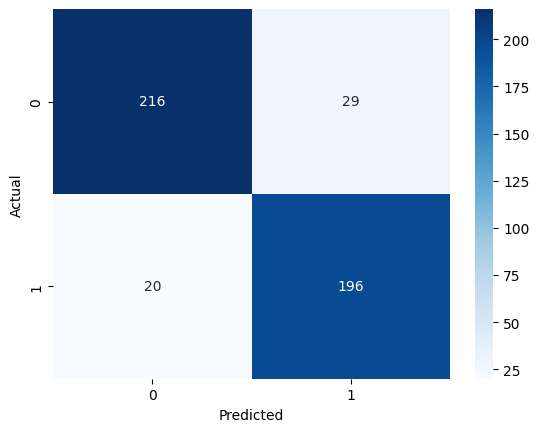

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model accurately predicted 216 states to have lower respect for human rights, while it falsely predicted that 29 states had higher respect when they actually had lower respect. It also predicted correctly that 196 states had higher respect for human rights, but falsely predicted that 20 states had lower respect when they actually had higher respect.

**Logistice Regression and Predictive Analysis Using Only Sklearn**

In [ ]:
# Creating the feature variables by subsetting and the target variable
X = data[['physint_sum', 'civpol_sum', 'repression_sum']]
y = data['respect_level']

In [ ]:
# using the same train_test_split method as before

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.8,
    random_state = 16,
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# making the Logistic Regression Classifier
clf = LogisticRegression()

# training model
clf.fit(X_train, y_train)

# getting the coefficients and intercept of the model
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)


Coefficients: [[-0.5334704  -0.31669526  1.33950806]]
Intercept: [-9.22976773]


In [ ]:
# getting accuracy of model on training data
train_accuracy = clf.score(X_test, y_test)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8937093275488069


In [ ]:
# creating confusion matrix again
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[216,  29],
       [ 20, 196]])

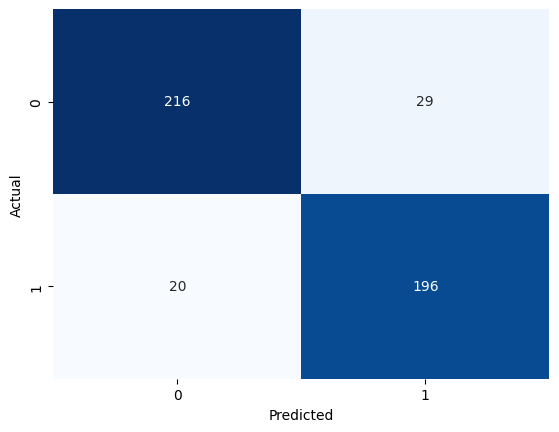

In [ ]:
# creating heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# making predictions using test data
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.8937093275488069


In [ ]:
# calculating precision score
precision = precision_score(y_test, y_pred)
print("precision:", precision)


precision: 0.8711111111111111


In [ ]:
# calculating recall score
recall = recall_score(y_test, y_pred)
print("recall:", recall)

recall: 0.9074074074074074


In [ ]:
# calculating f1-score
f1 = f1_score(y_test, y_pred)
print("f1-score:", f1)


f1-score: 0.888888888888889


In [ ]:
from sklearn.metrics import classification_report

# creating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       245
           1       0.87      0.91      0.89       216

    accuracy                           0.89       461
   macro avg       0.89      0.89      0.89       461
weighted avg       0.89      0.89      0.89       461



The accuracy score is 0.89, and the macro and weighted averages for each precision, recall, and f1-score are all equal because the proportions of lower and higher respect level observations are nearly equivalent.